In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../data/credit_data.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [7]:
print(len(df['nameOrig'].unique()))
print(len(df['nameDest'].unique()))

6353307
2722362


Cluster recipients based on the amount that they have received; also can cluster based on the nuumber of payments they've received.

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [16]:
df[df['type']=='CASH_OUT'].head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0


In [17]:
df.loc[(df['type']=='CASH_OUT') & (df['nameOrig']==df['nameDest']),:]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [9]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [12]:
df['nameDest'].value_counts().head(20)

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
C97730845       96
C977993101      96
C392292416      95
C1899073220     92
C306206744      91
C1234776885     90
C1782113663     90
C716083600      89
C998351292      89
C909295153      88
Name: nameDest, dtype: int64

In [13]:
df[df['nameDest']=='C1286084959']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
93,1,TRANSFER,583848.46,C1839168128,0.00,0.00,C1286084959,667778.00,2107778.11,0,0
367,1,TRANSFER,176334.26,C169880779,45136.00,0.00,C1286084959,1251626.46,2107778.11,0,0
388,1,CASH_OUT,373068.26,C1047934137,20034.00,0.00,C1286084959,1427960.73,2107778.11,0,0
471,1,CASH_IN,403418.39,C848097505,3834666.95,4238085.34,C1286084959,1801028.99,2107778.11,0,0
642,1,CASH_IN,222126.95,C870322840,6688712.64,6910839.59,C1286084959,1397610.60,2107778.11,0,0
659,1,CASH_IN,317393.38,C1197721383,8906617.38,9224010.75,C1286084959,1175483.65,2107778.11,0,0
701,1,CASH_OUT,18288.91,C1049590050,0.00,0.00,C1286084959,858090.28,2107778.11,0,0
803,1,TRANSFER,483544.30,C593447952,0.00,0.00,C1286084959,876379.19,2107778.11,0,0
841,1,CASH_OUT,607616.73,C1267042315,0.00,0.00,C1286084959,1359923.49,2107778.11,0,0
1157,1,TRANSFER,789419.02,C883678948,0.00,0.00,C1286084959,1967540.22,2107778.11,0,0


In [ ]:
df.groupby(['nameDest']).cou

In [25]:
numeric = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [27]:
df_std = df.copy()

In [28]:
df_std[numeric] = StandardScaler().fit_transform(df_std[numeric])

In [30]:
df_std.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,-0.281560,C1231006815,-0.229810,-0.237622,M1979787155,-0.323814,-0.333411,0,0
1,1,PAYMENT,-0.294767,C1666544295,-0.281359,-0.285812,M2044282225,-0.323814,-0.333411,0,0
2,1,TRANSFER,-0.297555,C1305486145,-0.288654,-0.292442,C553264065,-0.323814,-0.333411,1,0
3,1,CASH_OUT,-0.297555,C840083671,-0.288654,-0.292442,C38997010,-0.317582,-0.333411,1,0
4,1,PAYMENT,-0.278532,C2048537720,-0.274329,-0.282221,M1230701703,-0.323814,-0.333411,0,0


In [32]:
import scipy.cluster.hierarchy as shc

MemoryError: 

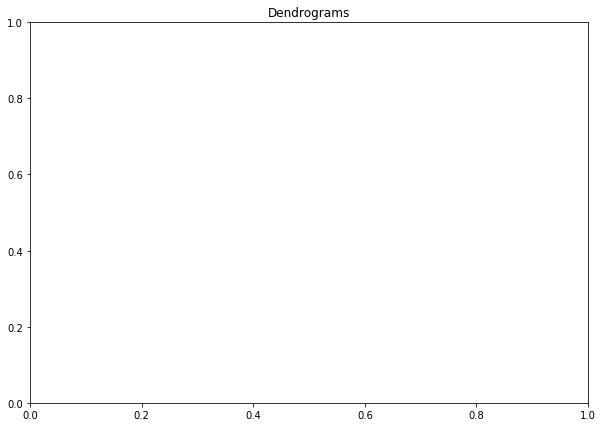

In [36]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)
dend = shc.dendrogram(shc.linkage(df_std[numeric], method='ward'))

In [39]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_std[numeric])

MemoryError: 

In [42]:

df_std[numeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 5 columns):
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
dtypes: float64(5)
memory usage: 242.7 MB
